 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

🡒 **Student name**: Nicola Zomer <br>
🡒 **ID Number**: 2058479


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

In [2]:
# USEFUL FUNCTION FOR SPLITTING THE DATA IN TRAINING AND TEST SET
# OUTPUT: X training, Y training, X testing, Y testing

def splitting_data(training_percentage, X, Y=None):
    
    if Y is None:
        # Y is not given, so X is the dataset
        dataset = X
        X = dataset[:, :-1]
        Y = dataset[:, -1]
    m = X.shape[0]
    m_train = int(m*training_percentage)
    
    return X[:m_train, :], Y[:m_train], X[m_train:, :], Y[m_train:]


In [3]:
# FUNCTION FOR CHECKING IF EACH UNIQUE LABEL APPEARS IN THE ARRAY A MINIMUM NUMBER OF TIMES

def check_minimum_labels(Y, minimum):
    labels = np.unique(Y)
    for label in labels:
        if np.sum(Y==label) < minimum:
            return False
    return True   

In [4]:
# O-1 LOSS FUNCTION

def loss_01(Y_true, Y_pred):
    if len(Y_true)!=len(Y_pred):
        return 'Error, the correct set and the predicted one have to be of the same size'
    
    return np.count_nonzero(Y_true!=Y_pred)/len(Y_true)

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [5]:
IDnumber = 2058479 # YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [6]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
# 1 --> 1
# 0 --> -1

m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [7]:
# DIVIDE IN TRAINING AND TEST

# m_training needs to be the number of samples in the training set
m_training = int(m*.75)

# m_test needs to be the number of samples in the test set
m_test = m - m_training

# X_training = instances for training set
# Y_training = labels for the training set
# X_test = instances for test set
# Y_test = labels for the test set

X_training, Y_training, X_test, Y_test = splitting_data(0.75, X, Y)

# Make sure that your TRAINING SET contains at least 10 elements from class 1 and at least 10 elements from class -1! 
# If it does not, modify the code so to apply more random permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

while not check_minimum_labels(Y_training, 10):
    permutation = np.random.permutation(m) # again random permutation
    
    X = X[permutation]
    Y = Y[permutation]
    
    X_training, Y_training, X_test, Y_test = splitting_data(0.75, X, Y)
    
print("\nNumber of classical instances in training:", np.sum(Y_training == -1))
print("Number of metal instances in training:", np.sum(Y_training == +1))

print('\nY training:', Y_training) # to make sure that Y_training contains both 1 and -1

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

# DATA NORMALIZATION
# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("\nMean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("\nMean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))


Number of classical instances in training: 73
Number of metal instances in training: 77

Y training: [ 1  1 -1  1 -1  1  1  1 -1  1 -1  1  1 -1  1  1  1  1 -1  1 -1  1  1 -1
  1 -1 -1  1 -1 -1 -1  1 -1 -1  1 -1  1 -1  1  1  1  1  1  1 -1 -1  1 -1
  1 -1  1  1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1 -1 -1  1
 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1 -1  1  1
 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1
 -1  1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1  1  1 -1 -1  1
 -1  1  1 -1 -1 -1]

Number of classical instances in test: 27
Number of metal instances in test: 23

Shape of training set: (150, 3)
Shape of test set: (50, 3)

Mean of the training input data: [ 0. -0.  0.]
Std of the training input data: [1. 1. 1.]

Mean of the test input data: [-0.0326442  -0.04586902 -0.15654809]
Std of the test input data: [0.96409379 1.07274861 0.9925935 ]


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [8]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[ 1.         -1.26887608  0.4679917   0.18843803]
 [ 1.         -1.04530572  1.24366055  1.85445264]
 [ 1.         -1.5518323  -1.04142377 -1.14839235]
 [ 1.         -1.16108323  1.11720304  1.02592911]
 [ 1.          0.86161787 -1.11964333 -1.47065091]
 [ 1.         -0.30853979  0.0553675   0.12925271]
 [ 1.          0.86161787  0.93066561  0.71871065]
 [ 1.         -0.92062226  1.57914586  0.39666116]
 [ 1.         -0.48151962 -0.6005635  -1.64766904]
 [ 1.         -0.48151962  1.57647387  0.96494712]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [9]:
# A template is provided, but feel free to build a different implementation

def perceptron_update(current_w, x, y):
    # Place in this function the update rule of the perceptron algorithm
    # x is the selected misleading sample, y the corrispondent label
    
    new_w = current_w+y*x
    return new_w

def perceptron(X, Y, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm
    
    f = X.shape[1]  # number of features (+1)
    # print('f', f)
    
    #init the algorith with w=0, use a best_w variable to keep track of the best solution
    curr_w = np.zeros(f, dtype='int')
    best_w = curr_w
    num_samples = X.shape[0]
    best_error = 1
    
    index_misclassified = 1 #will be ovewritten
    num_misclassified = 1 #will be ovewritten
    
    #main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        index_misclassified = -1
        num_misclassified = 0
    
        # avoid working always on the same sample, you can use a random permutation or randomize the choice of misclassified
        
        # PLACE YOUR CODE TO RANDOMIZE
        np.random.permutation(X)
        exist_wrong_sample = False
        
        for i in range(num_samples):
            # check if the i-th randomly selected sample is misclassified
            # store the number of randomly classified samples and the index of at least one of them
            
            if Y[i]*np.dot(curr_w, X[i]) <= 0:
                num_misclassified+=1
                if not exist_wrong_sample:
                    exist_wrong_sample = True
                    index_misclassified = i
        
        if exist_wrong_sample:            
            # call update function using a misclassifed sample
            curr_w = perceptron_update(curr_w, X[index_misclassified], Y[index_misclassified])
        
        # error & best solution
        curr_error = num_misclassified/num_samples
        if curr_error < best_error:
            best_error = curr_error
            best_w = curr_w
    
        num_iter += 1
        
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [10]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))

Training Error of perpceptron (100 iterations): 0.0


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [11]:
#now use the w_found to make predictions on test dataset

num_errors = np.sum((np.dot(X_test, w_found)*Y_test)<=0)
true_loss_estimate = num_errors/m_test  # error rate on the test set

#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perpceptron (100 iterations): 0.02


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples? Explain what you observe. [Write the answer in this cell]

> **ANSWER QUESTION 1** <br>
In general, depending on the random splitting of the data, the test error is slightly larger than the training error. However, they both are very small, with the second one that often is equal to zero already with less that 100 iterations. <br>
The normalization plays a key role here, in fact without removing the mean and subtracting the variance to the data the algorithm is very unstable and the test error is always between $0.4$ and $0.5$, so very close to a random choice of the label. 

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [12]:
#now run the perceptron for 3000 iterations here!

w_found, error = perceptron(X_training,Y_training, 3000)
print("Training Error of perpceptron (4000 iterations): " + str(error))

num_errors = np.sum((np.dot(X_test, w_found)*Y_test)<=0)

true_loss_estimate = num_errors/m_test  # error rate on the test set
print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

Training Error of perpceptron (4000 iterations): 0.0
Test Error of perpceptron (4000 iterations): 0.02


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples when running for a larger number of iterations? Explain what you observe and compare with the previous case. [Write the answer in this cell]

> **ANSWER QUESTION 2** <br>
> Being the algorithm very stable already with 100 iterations, an increase of the maximum number of iterations doesn't have a big impact on the performances. For example, if with 100 maximum iterations the training error is already zero, it means that the perceptron needs less than 100 iterative steps to perfectly converge on the training data. Thus, allowing the algorithm to perform a larger number of iterations doesn't produce any improvement in the result.


# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

> IN THIS CASE I USE **NON-HOMOGENEOUS COORDINATES**

In [13]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [14]:
# DIVIDE IN TRAINING AND TEST

# m_training needs to be the number of samples in the training set
m_training = int(m*.75)

# m_test needs to be the number of samples in the test set
m_test = m - m_training

# X_training = instances for training set
# Y_training = labels for the training set
# X_test = instances for test set
# Y_test = labels for the test set

X_training, Y_training, X_test, Y_test = splitting_data(0.75, X, Y)

# Make sure that your TRAINING SET contains at least 10 elements from class 1 and at least 10 elements from class -1! 
# If it does not, modify the code so to apply more random permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

while not check_minimum_labels(Y_training, 10):
    permutation = np.random.permutation(m) # again random permutation
    
    X = X[permutation]
    Y = Y[permutation]
    
    X_training, Y_training, X_test, Y_test = splitting_data(0.75, X, Y)
    
print("\nNumber of classical instances in training:", np.sum(Y_training == -1))
print("Number of metal instances in training:", np.sum(Y_training == +1))

print('\nY training:', Y_training) # to make sure that Y_training contains both 1 and -1

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))



Number of classical instances in training: 75
Number of metal instances in training: 75

Y training: [ 1  1 -1  1 -1  1 -1  1 -1 -1 -1 -1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1  1  1 -1 -1  1  1  1 -1 -1
 -1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1 -1  1  1  1
  1  1  1  1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1
  1 -1  1 -1 -1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1  1 -1  1  1 -1 -1  1
  1 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1 -1
 -1 -1  1  1 -1  1]

Number of classical instances in test: 25
Number of metal instances in test: 25

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [15]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5, fit_intercept=True) #a large C disables regularization

#SET FIT INTERCEPT TO 'FALSE' IF YOU USE HOMOGENEOUS COORDINATES (FOR THE GRAPHS BELOW) 

#learn from training set
results = logreg.fit(X_training, Y_training)

#predict on training set
Y_pred_train = results.predict(X_training)

#print the error rate = fraction of misclassified samples    
error_rate_training = loss_01(Y_training, Y_pred_train)
print("Error rate on training set: "+str(error_rate_training))

#predict on test set
Y_pred_test = results.predict(X_test)

#print the error rate = fraction of misclassified samples    
error_rate_test = loss_01(Y_test, Y_pred_test)
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.02


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [16]:
# FUNCTION TO COMPUTE THE LOGISTIC REGRESSION LOSS (directly from the data)

def loss_logreg(training_percentage, X, Y=None):
    if Y is None:
        # Y is not given, so X is the dataset
        dataset = X
        X = dataset[:, :-1]
        Y = dataset[:, -1]
    
    X_training, Y_training, X_test, Y_test = splitting_data(training_percentage, X_reduced, Y)
    
    logreg = linear_model.LogisticRegression(C=1e5, fit_intercept=True)
    results = logreg.fit(X_training, Y_training)

    #predict on test set    
    Y_pred_test = results.predict(X_test)

    #test error (true loss estimation)  
    return loss_01(Y_test, Y_pred_test)

In [17]:

# to make the plot we need to reduce the data to 2D, so we choose two features
# Select the best 2 features according to your experiments

features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
features_combinations = [[0, 1], [0, 2], [1, 2]]
test_errors = []

for i in range(3): 
    index_feature1 = features_combinations[i][0]
    index_feature2 = features_combinations[i][1]
    features = features_combinations[i]

    X_reduced = X[:,features]
    test_errors.append(loss_logreg(0.75, X_reduced, Y))
    
best_features = features_combinations[np.argmin(np.array(test_errors))]
feature_name0 = features_list[best_features[0]]
feature_name1 = features_list[best_features[1]]
print('Best features: ' + feature_name0 + ' and ' + feature_name1)

X_reduced = X[:,best_features]
X_training, Y_training, X_test, Y_test = splitting_data(0.75, X_reduced, Y)


Best features: tempo and chroma_stft


Now learn a model using the training data and measure the performances.

In [18]:
#learning from training data
results = logreg.fit(X_training, Y_training)

#predict on training set
Y_pred_train = results.predict(X_training)

#print the error rate = fraction of misclassified samples
error_rate_training = loss_01(Y_training, Y_pred_train)
print("Error rate on training set: "+str(error_rate_training))

#predict on test set
Y_pred_test = results.predict(X_test)

#print the error rate = fraction of misclassified samples    
error_rate_test = loss_01(Y_test, Y_pred_test)
print("Error rate on test set: "+str(error_rate_test))

Error rate on training set: 0.02666666666666667
Error rate on test set: 0.0


**TO DO** [Answer the following] Which features did you select and why? Compare the performances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

> **ANSWER QUESTION 3** <br>
> I selected the combination of 2 features that produces the best result on the test set (i.e. the smaller test error). <br>
> Using a subset of features, both the errors (training and test) are still very small and comparable to the ones obtained using all the features (often the test error is even smaller or equal to zero). So, using only 2 features does not introduce a big error on the solution of our problem, that remains very stable and still converges. Actually, if we look at the test error the performaces seem to improve in this second case. 

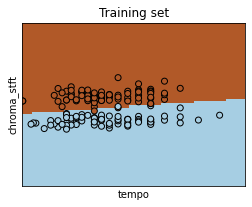

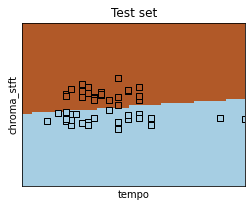

In [19]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig1 = plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

fig1.patch.set_facecolor('white')
plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig2 = plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

fig2.patch.set_facecolor('white')
plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [20]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sl
from scipy import stats

In [21]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("\nShape of data array: " + str(Data.shape))

#for more interesting visualization: use Panda!
print('\n')
pd.set_option("display.max_columns", None)
pd.DataFrame(Data, columns = ('CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'))

DescribeResult(nobs=500, minmax=(array([  0.00632,   0.     ,   0.46   ,   0.     ,   0.385  ,   3.561  ,
         2.9    ,   1.1296 ,   1.     , 187.     ,  12.6    ,   0.32   ,
         1.73   ,  50.     ]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([  3.65578576,  11.5       ,  11.13174   ,   0.07      ,
         0.5544514 ,   6.28297   ,  68.4246    ,   3.8119318 ,
         9.642     , 409.624     ,  18.4286    , 356.20804   ,
        12.69874   , 225.68      ]), variance=array([   74.72521949,   548.90581162,    47.61982282,     0.06523046,
           0.01358383,     0.49761833,   799.31416317,     4.46304043,
          75.96175952, 28560.51966333,     4.67663531,  8416.5713729 ,
          51.3361942 ,  8529.82925852]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0.40691344, -0.58266003,  0.99061328,  0.98

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,240.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,216.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,347.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,334.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,362.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,393.29,17.60,231.0
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,197.0
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,183.0
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,212.0


# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [22]:
#mean price
mean_price = np.mean(Data[:, -1])
print('Mean price in $1000s:', mean_price)

#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)
m_test = num_total_samples - m_t

print ("Cardinality of Training Set: ", m_t)

#shuffle the data (np.random.shuffle acts on the first axis)
np.random.shuffle(Data)

#training data and test data, to be used to estimate the true loss of the final model(s)
X_training, Y_training, X_test, Y_test = splitting_data(0.7, Data)

print ("\nTraining input data size: ", X_training.shape)
print ("Training output data size: ", Y_training.shape)

print ("\nTest input data size: ", X_test.shape)
print ("Test output data size: ", Y_test.shape)

Mean price in $1000s: 225.68
Total number of samples:  500
Cardinality of Training Set:  350

Training input data size:  (350, 13)
Training output data size:  (350,)

Test input data size:  (150, 13)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [27]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

# number of training/test samples
m_training = X_training.shape[0]
m_test = X_test.shape[0]

# HOMOGENEOUS COORDINATES:
# #add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
X_trainingH = np.insert(X_training, 0, [1], axis = 1)   # H: in homogeneous coordinates
X_testH = np.insert(X_test, 0, [1], axis = 1)           # H: in homogeneous coordinates

print("\nTraining set in homogeneous coordinates:")
pd.DataFrame(X_trainingH[:10], columns = ('ones', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'))

Mean of the training input data: [ 0.  0.  0.  0. -0. -0.  0.  0. -0. -0. -0.  0. -0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [-0.05623147 -0.11613198  0.0440076   0.01884232  0.10551324  0.0999989
 -0.02445642 -0.06882799  0.0326526  -0.01656915  0.00136571 -0.04345666
 -0.07730423]
Std of the test input data: [0.79013204 0.91738613 0.98736592 1.03149258 1.07592033 0.8966896
 0.92764279 0.91061967 1.01656508 1.00129998 0.99784452 1.0472521
 0.92440828]

Training set in homogeneous coordinates:


,ones,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,-0.394970,0.403638,-0.748775,-0.271329,-1.054610,0.629562,-1.772359,1.833164,-0.295193,-0.476792,0.310986,0.402456,-0.862453
1,1.0,-0.156153,-0.515077,1.234313,-0.271329,2.817005,-0.180825,1.087051,-1.125590,-0.526070,-0.044222,-1.724368,-2.042218,2.041387
2,1.0,0.139648,-0.515077,1.020394,-0.271329,1.426743,0.049336,0.802843,-0.687322,1.667262,1.514215,0.819825,0.306698,0.601771
3,1.0,-0.407878,1.990510,-1.351506,-0.271329,-1.230593,-0.519864,-1.737700,3.164821,-0.641508,0.003183,-0.059078,0.386847,-0.694293
4,1.0,-0.412645,0.654197,0.578102,-0.271329,-0.764239,-0.069190,-1.377241,-0.088082,-0.641508,-0.832329,-0.105336,0.431129,-0.910303
5,1.0,0.656139,-0.515077,1.020394,-0.271329,1.057180,0.734306,1.045460,-1.153804,1.667262,1.514215,0.819825,0.437439,1.144532
6,1.0,-0.330212,-0.515077,-0.419224,-0.271329,-0.113104,-0.373774,0.452782,0.185287,-0.641508,-0.613081,1.189889,0.325074,0.246311
7,1.0,-0.392732,0.006920,-0.458250,-0.271329,-0.236292,-0.868551,1.087051,1.027650,-0.526070,-0.589379,-1.493078,0.323746,2.332591
8,1.0,1.533799,-0.515077,1.020394,-0.271329,1.057180,-0.052652,1.087051,-1.140828,1.667262,1.514215,0.819825,0.402456,1.218359
9,1.0,0.543598,-0.515077,1.020394,-0.271329,0.291656,-0.959513,0.068061,-0.828024,1.667262,1.514215,0.819825,-3.915992,0.586733


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ 
so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


**TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 

 

In [24]:
# compute linear regression (least-squares) coefficients for training data using linalg.lstsq

A = np.dot(X_trainingH.T, X_trainingH)
b = np.dot(X_trainingH.T, Y_training)

w_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(A, b, rcond = None)
# "IF the rank of A is < N or M <= N, RSStr_np is an empty array object"object
# In this case A is a (14, 14) array, so N=M: I expect RSStr_np to be an empty array. 
print("LS coefficients with numpy lstsq:\n", w_np)

# compute Residual sums of squares
RSStr_hand = np.sum((np.dot(X_trainingH, w_np)-Y_training)**2) 

print('\nRSS by hand: ', RSStr_hand)
print("Empirical risk by hand:", RSStr_hand/m_training)
print("\nRSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq: ", RSStr_np/m_training)
MSE = sl.metrics.mean_squared_error((np.dot(X_trainingH, w_np)), Y_training, squared = True)
print("\nMSE with sklearn.metrics: ", MSE)
print('RMSE (Root Mean Squared Error): ', np.sqrt(MSE))


# If the predicted line is actually the best fit, we should have the sum of the residuals equals zero.
res_sum = np.sum((np.dot(X_trainingH, w_np)-Y_training))
print('\nSum of (yi-h(xi)): is it almost zero?', res_sum)

LS coefficients with numpy lstsq:
 [224.49428571  -7.9293654    9.69691108   3.86912909   6.38110669
 -22.94999006  29.07315172   2.55794337 -29.68900525  22.01603304
 -18.68547812 -21.74052926   6.39725549 -34.25577265]

RSS by hand:  737352.0114929148
Empirical risk by hand: 2106.7200328368995

RSS with numpy lstsq:  []
Empirical risk with numpy lstsq:  []

MSE with sklearn.metrics:  2106.7200328368995
RMSE (Root Mean Squared Error):  45.89901995508073

Sum of (yi-h(xi)): is it almost zero? -1.2505552149377763e-11


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [25]:
#compute predictions on training and test

prediction_training = np.dot(X_trainingH, w_np)
prediction_test = np.dot(X_testH, w_np)

#what about the loss for points in the test data?
RSS_test = np.sum((prediction_test-Y_test)**2)

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)
MSE = sl.metrics.mean_squared_error(prediction_test, Y_test, squared = True)
print("\nMSE on test data with sklearn.metrics: ", MSE)
print('RMSE (Root Mean Squared Error): ', np.sqrt(MSE))

# res_sum = np.sum((prediction_test-Y_test))
# print('\nSum of (yi-h(xi)):', res_sum)

RSS on test data: 371390.33551534737
Loss estimated from test data: 2475.935570102316

MSE on test data with sklearn.metrics:  2475.935570102316
RMSE (Root Mean Squared Error):  49.758773800228596


**TO DO** [Answer the following] Comment on the results you get and on the difference between the train and test errors.

> **ANSWER QUESTION 4** <br>
> First of all, I notice that the sum of the residuals, computed on the training set, 
> $$
> \sum_{z_i\in S_t}(y_i-h(x_i))
> $$
> is very close to zero $(\simeq 10^{-12})$, meaning that the solution is close to the "best linear fit" of the training set. <br>
> The RSS per sample on the training data is around $2000$, and it is even bigger when computed on the test set $(\simeq 3000)$. This means that the RMSE (Root Mean Squared Error) is around $40-50$ on the training set and around $50-60$ on the test set. <br>
> If we compare these with the prices of the houses in \$1000s (notice that the mean price is $225.68$), we see that the regression error loss is rather large. Since both the training error and the test error are quite big, probably we are slighty underfitting the training data. This could mean that the linear model is not the best solution for this problem, so we could try using a more complex one. Moreover, it could be interesting to select a subset of features for training the model and search for a combination of these that produces better results on the test set (if exists). 

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [26]:
from sklearn import linear_model

# build the LinearRegression() model and train it
model = linear_model.LinearRegression()
LinReg = model.fit(X_training, Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:\n", LinReg.coef_)

# predict output values on training and test sets
prediction_training = LinReg.predict(X_training)
prediction_test = LinReg.predict(X_test)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))
print("Measure on test data:", 1-LinReg.score(X_test, Y_test))

Intercept: 224.4942857142861
Least-Squares Coefficients:
 [ -7.9293654    9.69691108   3.86912909   6.38110669 -22.94999006
  29.07315172   2.55794337 -29.68900525  22.01603304 -18.68547812
 -21.74052926   6.39725549 -34.25577265]
Measure on training data: 0.255500917618782
Measure on test data: 0.27131814497905116
